In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

df=pd.read_csv("C://Users//hp//Desktop//Exploratory Data Analysis Project//Loan Approval Analysis//loan_approval_dataset.csv")

In [210]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [211]:
df.columns
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [212]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [213]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [214]:
# There are no null values in the dataset

# Dataframe Description

In [215]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# Data Cleaning

In [216]:
# Checking for duplicates and null values 

df.duplicated(keep=False).sum()                #To find how many duplicate rows are present in the dataframe 


0

In [217]:
# Our data contains no duplicate rows

# Convert values in a column to absolute value 

In [218]:
df['residential_assets_value'] = df['residential_assets_value'].abs()
(df['residential_assets_value']<0).sum()

0

# Adding new columns to dataframe

In [219]:
# Adding the CIBIL Rating column

def cibil_rating (value):
    if value>=300 and value<=549:
        return 'Poor'
    if value>=550 and value<=649:
        return 'Average'
    if value>=650 and value<=749:
        return 'Good'
    if value>=750 and value<=900:
        return 'Excellent'
    else: 
        return 'Error'
    
df['CIBIL rating'] = df['cibil_score'].apply(cibil_rating)

df.head()


#Adding income level column

def income_levels (value):
    if value>=100000 and value<=1000000:
        return 'Low'
    if value>=1000001 and value<=4000000:
        return 'Lower-middle'
    if value>=4000001 and value<=7500000:
        return 'Upper middle'
    if value>=7500000 and value<=10000000:
        return 'High'
    else: 
        return 'Error'
    
df['Income levels'] = df['income_annum'].apply(income_levels)

df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL rating,Income levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper middle
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High


# Adding Loan Rating Column

In [220]:
# Grouping Loan Amounts as bronze, silver, gold and Platinum

def loan_rating(value):
    if value>=100000 and value<=10000000:
        return 'Bronze'
    if value>=10000001 and value<=20000000:
        return 'Silver'
    if value>=20000001 and value<=30000000:
        return 'Gold'
    if value>=30000001 and value<=40000000:
        return 'Platinum'
    else:
        return 'Unknown'
    
df['Loan Rating']=df['loan_amount'].apply(loan_rating)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL rating,Income levels,Loan Rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper middle,Silver
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold


# Addition of Loan Term Column

In [221]:
def loan_term_range(value):
    if value>=0 and value<=7:
        return 'Short-Term'
    if value>=8 and value<=14:
        return 'Intermediate'
    if value>=15 and value<=20:
        return 'Long-Term'
    else:
        return 'Unknown'
    
df['Loan term Type']=df['loan_term'].apply(loan_term_range)
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL rating,Income levels,Loan Rating,Loan term Type
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper middle,Silver,Intermediate
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term


# Addition of Dependency level column

In [222]:
def dependents(value):
    if value>=0 and value<=1:
        return 'Low'
    elif value>=2 and value<=3:
        return 'Moderate'
    if value>=4 and value<=5:
        return 'High'
    else:
        return 'Unknown'
    
df['Dependent levels']=df['no_of_dependents'].apply(dependents)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL rating,Income levels,Loan Rating,Loan term Type,Dependent levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


# Exploratory Data Analysis

# a) Customer Segmentation

In [223]:
# Grouping on the basis of Income
#df.columns
income = df['Income levels'].value_counts().reset_index()
income
income = income.rename(columns={'count':'Number of Applicants'})
print(income)
income.head()

  Income levels  Number of Applicants
0  Upper middle                  1548
1  Lower-middle                  1284
2          High                  1047
3           Low                   390


,Income levels,Number of Applicants
0,Upper middle,1548
1,Lower-middle,1284
2,High,1047
3,Low,390


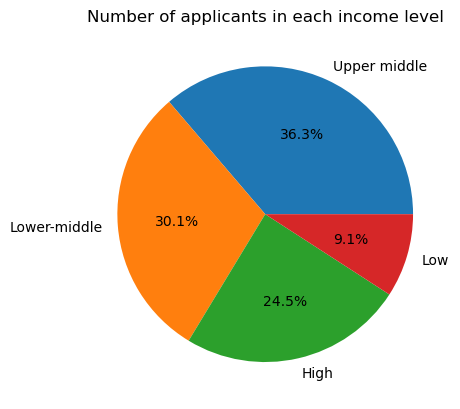

In [224]:
#Plotting a pie chart 

plt.pie(income['Number of Applicants'], labels=income['Income levels'], autopct='%1.1f%%')
plt.title("Number of applicants in each income level")
plt.show()

# Loan Applicants Segmentation

# b) Segment according to number of dependents 

In [225]:
#df.columns
dependents = df['Dependent levels'].value_counts().reset_index()
dependents = dependents.rename(columns={'Number of Applicants':'Dependent levels', 'count':'Number of Applicants'})
dependents.head()

,Dependent levels,Number of Applicants
0,Moderate,1435
1,High,1425
2,Low,1409


# c) Segement according Education

In [226]:
education = df['education'].value_counts().reset_index()
education = education.rename(columns={'Number of Applicants':'education levels', 'count':'Number of Applicants'})
education.head()

,education,Number of Applicants
0,Graduate,2144
1,Not Graduate,2125


# d) Segment according to Employement 

In [227]:
employement = df['self_employed'].value_counts().reset_index()
employement = employement.rename(columns={'Number of Applicants':'self_employement', 'count':'Number of Applicants'})
employement.head()

,self_employed,Number of Applicants
0,Yes,2150
1,No,2119


# Rate of Loan Approval

([<matplotlib.patches.Wedge at 0x19dfc2ef590>,
 [Text(-0.4118671696461923, 1.0199830560198708, 'Approved'),
  Text(0.41186726514389654, -1.0199830174580788, 'Rejected')],
 [Text(-0.22465481980701396, 0.5563543941926568, '62.2%'),
  Text(0.22465487189667083, -0.556354373158952, '37.8%')])

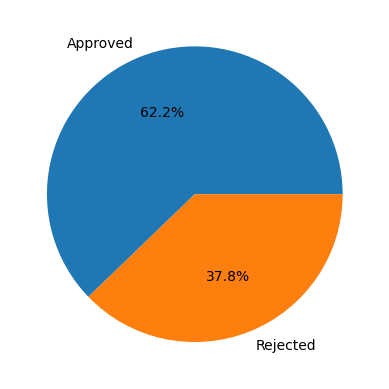

In [228]:
# Overall Rate

loans=df['loan_status'].value_counts().reset_index()
loans=loans.rename(columns={'Number of Applicants':'Loan Status', 'count':'Number of Applicants'})
loans.head()

plt.pie(loans['Number of Applicants'], labels=loans['loan_status'], autopct='%1.1f%%')

# Applicants Loan Approval

# a) Loan Approval according to education level

In [229]:
#Grouping data by education and loan status

education = df.groupby(['education', 'loan_status']).size().reset_index()

#filter to include approved and rejected
education = education[education['loan_status'].isin(['Approved', 'Rejected'])]

education.head()

,education,loan_status,0
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


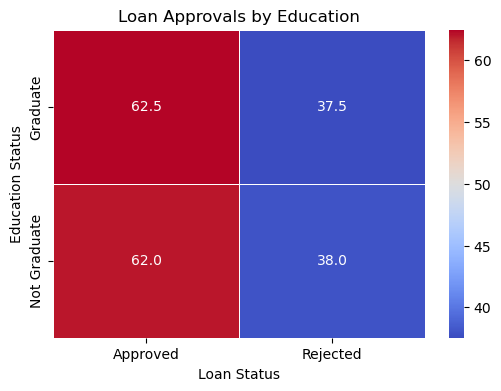

In [230]:
#Create a pivot table 
pivot_table = education.pivot(index='education', columns='loan_status', values=0)
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals, axis=0)*100

#Create Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

#Labeling the heatmap
plt.title('Loan Approvals by Education')
plt.xlabel('Loan Status')
plt.ylabel('Education Status')

plt.show()

In [231]:
#There is no significance difference between graduates and non-graduates getting loan approved

# b) Loan Approval by Type of Employement 

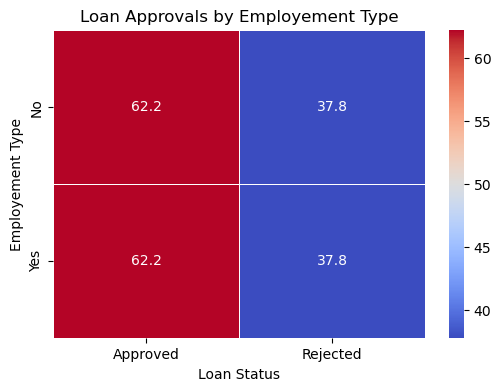

In [232]:
employement_type = df.groupby(['self_employed', 'loan_status']).size().reset_index()

#filter to include approved and rejected 

employement_type = employement_type[employement_type['loan_status'].isin(['Approved', 'Rejected'])]
employement_type = employement_type.rename(columns={0:'Total'})
employement_type.head()


#Create a pivot table 
pivot_table = employement_type.pivot(index='self_employed', columns='loan_status', values='Total')
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals, axis=0)*100

#Create Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

#Labeling the heatmap
plt.title('Loan Approvals by Employement Type')
plt.xlabel('Loan Status')
plt.ylabel('Employement Type')

plt.show()

In [233]:
# The loan approval does not depend on the type of employement 

# Loan Approval Rate by CIBIL Rating

In [234]:
# Group data according to CIBIL Rating and loan status and count for each combination 

cibil_rates=df.groupby(['CIBIL rating', 'loan_status']).size().reset_index()
cibil_rates=cibil_rates.rename(columns={0:'Total'})
cibil_rates.head()

,CIBIL rating,loan_status,Total
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740


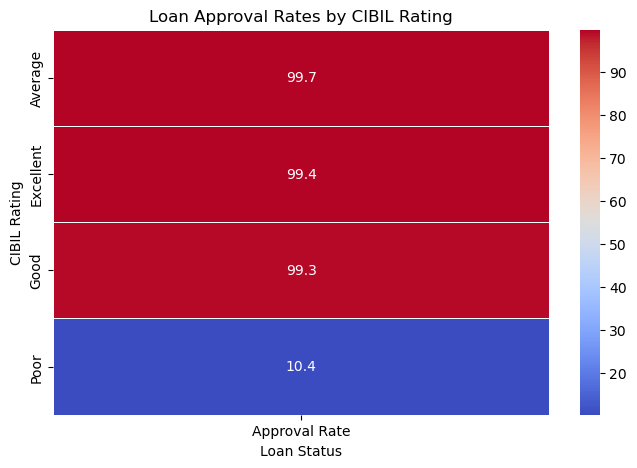

In [235]:
#Pivot table
pivot_table = cibil_rates.pivot(index='CIBIL rating', columns='loan_status', values='Total')

#Calculating the approval rates
pivot_table['Approval Rate'] = pivot_table['Approved'] / (pivot_table['Approved']+pivot_table['Rejected'])*100

plt.figure(figsize=(8,5))
sns.heatmap(pivot_table[['Approval Rate']], annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

plt.title('Loan Approval Rates by CIBIL Rating')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Rating')

plt.show()

# Correlation Analysis: Test for Significance

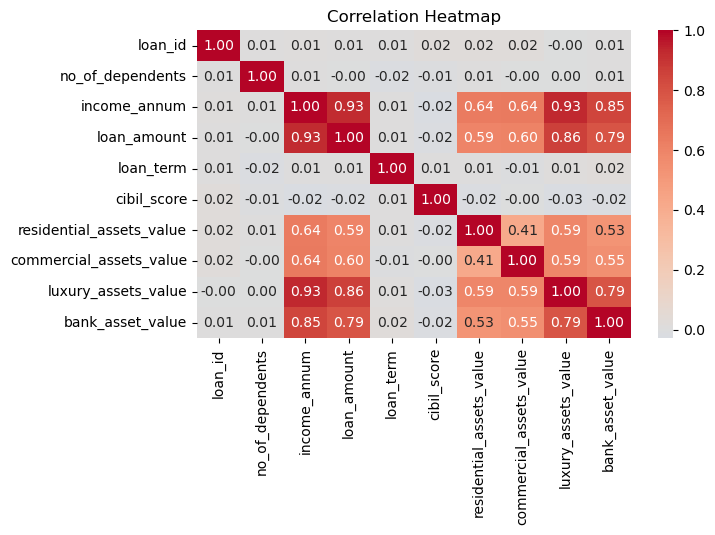

In [236]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(7,4))
sns.heatmap(correlation_matrix, annot=True, center=0, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

In [237]:
#Correlation between asset value and income
assets=['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
income='income_annum'

correlations = df[assets + [income]].corr()

correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.636824
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.640328
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.929145
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.851093
income_annum,0.636824,0.640328,0.929145,0.851093,1.000000


In [238]:
#Correlation between asset value and loan
assets=['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
loan='loan_amount'

correlations = df[assets + [loan]].corr()

correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_amount
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.594582
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.603188
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.860914
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.788122
loan_amount,0.594582,0.603188,0.860914,0.788122,1.000000


# Asset value impact/influence on loan approval eligibility

In [239]:
# If there is a relation between asset value and getting loan approval 

# Splitting data into two groups based on loan status
approved=df[df['loan_status'] == 'Approved']
rejected=df[df['loan_status'] == 'Rejected']

# Perform t-test
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

for columns in assets:
    t_stat, p_value = ttest_ind(approved[columns], rejected[columns], equal_var=False)
    print(f"T-test for {columns}:")
    print(f" T-Statistics: {t_stat}:")
    print(f" P-value for {p_value}:")
    if p_value < 0.05:
        print(f" The difference in {columns} between approved and rejected loans is statistically significant")
    else:
        print(f" The difference in {columns} between approved and rejected loans is not statistically significant")

T-test for residential_assets_value:
 T-Statistics: -0.9399394365500209:
 P-value for 0.34731539500224484:
 The difference in residential_assets_value between approved and rejected loans is not statistically significant
T-test for commercial_assets_value:
 T-Statistics: 0.5387741456120381:
 P-value for 0.5900779272018964:
 The difference in commercial_assets_value between approved and rejected loans is not statistically significant
T-test for luxury_assets_value:
 T-Statistics: -1.013970039592796:
 P-value for 0.3106683217824068:
 The difference in luxury_assets_value between approved and rejected loans is not statistically significant
T-test for bank_asset_value:
 T-Statistics: -0.4448616890142232:
 P-value for 0.6564475917396153:
 The difference in bank_asset_value between approved and rejected loans is not statistically significant


# Using ANOVA to determine a correlation between income and asset value

In [240]:
# Null hypothesis H0: There is no relation between assets value and income
# Alternate Hypothesis H1: There is a relation between assets value and income

#Extracting values in columns


residential_assets = df['residential_assets_value']
commercial_assets = df['commercial_assets_value']
luxury_assets = df['luxury_assets_value']
bank_asset = df['bank_asset_value']
income = df['income_annum']

#Perform Anova
f_statistics, p_value = f_oneway(residential_assets, commercial_assets, luxury_assets, bank_asset, income)

print('The f statistics:', f_statistics)
print('The p value is:', p_value)

if p_value < 0.05:
    print('There is a significant influence of income on asset value')
else:
    print('There is no significant influence of income on asset value')

The f statistics: 2518.654468935116
The p value is: 0.0
There is a significant influence of income on asset value


In [241]:
#Test for significance between income and loan amount

income = df['income_annum']
loan = df['loan_amount']

#perform an independent t-test
t_stat, p_value = ttest_ind(income, loan, equal_var=True)

print('The T statistics:', t_stat)
print('The p value is:', p_value)

if p_value < 0.05:
    print('There is a significant influence of income on asset value')
else:
    print('There is no significant influence of income on asset value')

The T statistics: -69.51489699866843
The p value is: 0.0
There is a significant influence of income on asset value


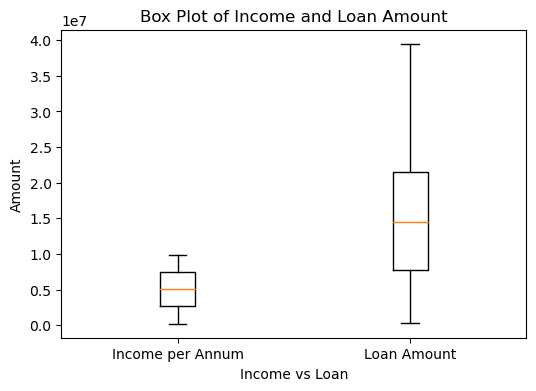

In [242]:
# Box-plot to represent correlation between income and loan amount

income = df['income_annum']
loan = df['loan_amount']

# create the figure
plt.figure(figsize=(6,4))
ax = plt.axes()

ax.boxplot([income, loan], labels=['Income per Annum', 'Loan Amount'])

# Chart Labels
plt.xlabel('Income vs Loan')
plt.ylabel('Amount')
plt.title('Box Plot of Income and Loan Amount')

plt.show()

# Chi-Square analysis: Determine correlation between loan status and number of dependents

In [243]:
# Creating contigency table
#df
contingency_tabel = pd.crosstab(df['loan_status'], df['Dependent levels'])

#Perform chi-Square
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_tabel)

print("Chi-Square test statistics:", chi2)
print("The P-value is:", p_value)
print("The dof is:", dof)

#Set the significance level
alpha=0.05

if p_value < alpha:
    print('There is a significant relationship between loan_status and the number of dependents')
else:
    print('There is a no significant relationship between loan_status and the number of dependents')

Chi-Square test statistics: 1.1296798036848839
The P-value is: 0.5684511474541935
The dof is: 2
There is a no significant relationship between loan_status and the number of dependents


# Logistic Regression

In [206]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL rating,Income levels,Loan Rating,Loan term Type,Dependent levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,Poor,Low,Bronze,Intermediate,High
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,Average,Lower-middle,Silver,Long-Term,Low
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,Poor,Upper middle,Gold,Long-Term,Moderate
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,Excellent,Upper middle,Silver,Intermediate,Low


In [244]:
def edu_status(status):
    if status == 'Graduate':
        return 1
    elif status == 'Not Graduate':
        return 0
    else:
        return 'Unknown'
df['edu status']=df['education'].apply(edu_status)

df.head()

def type_employement(employement):
    if employement == 'Yes':
        return 1
    elif employement == 'No':
        return 0
    
df['Employement type']=df['self_employed'].apply(type_employement)

def loan_approval(status):
    if status == 'Approved':
        return 1
    elif status == 'Rejected':
        return 0
    else:
        return 'Unknown'
df['Loan approval']=df['loan_status'].apply(loan_approval)

In [245]:
x=df.drop(columns={'loan_id', 'CIBIL rating', 'Income levels', 'Loan Rating', 'Loan term Type', 'Dependent levels', 'loan_status', 'education', 'self_employed'})

In [246]:
x

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu status,Employement type,Loan approval
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0,1
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1,1,0
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,1,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,0,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,0,1


In [288]:
# Defining the Y axis
y = df['Loan approval']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Loan approval, dtype: int64

In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [290]:
# Split data to test and training dataset

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=21)

# test_size indicates 30% of data will be used for testing and remaining for training

# Scaling our data

In [291]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [292]:
X_test_scaled

array([[ 0.88884642, -1.58758085, -1.44408992, ...,  0.9973262 ,
        -1.00739009,  0.76769897],
       [-0.87390121,  0.66430722,  0.54237859, ..., -1.00268097,
         0.99266412,  0.76769897],
       [ 0.30126387,  1.05749403,  0.93967229, ...,  0.9973262 ,
        -1.00739009, -1.30259391],
       ...,
       [ 0.30126387,  1.62940211,  1.70115189, ..., -1.00268097,
         0.99266412, -1.30259391],
       [ 1.47642896,  1.66514636,  2.48470336, ..., -1.00268097,
         0.99266412, -1.30259391],
       [-0.28631867, -0.01483363,  0.15612082, ..., -1.00268097,
         0.99266412,  0.76769897]])

In [293]:
#Training the model
log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

In [294]:
#Predict 
log_reg.predict(X_train_scaled)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [295]:
#Accuracy

In [296]:
log_reg.score(X_train_scaled, y_train)

1.0

In [264]:
log_reg.score(X_test_scaled, y_test) 

1.0